<h1 align='center'>Titanic Data Set - Model Building

## Importing Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

---

### Loading Dataset

In [2]:
df = pd.read_csv('titanic_processed_data.csv')
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Age,Sex,Pclass,Embarked,Family,Is_Alone,Survived
0,22.0,1,3,2,1,0,0
1,38.0,0,1,0,1,0,1
2,26.0,0,3,2,0,1,1
3,35.0,0,1,2,1,0,1
4,35.0,1,3,2,0,1,0


#### Checking for Balanced Dataset

In [3]:
a = df["Survived"].value_counts()
# 0 = Not Survived
# 1 = Survived

print(f'Died (%) : {a[0] / df.shape[0]}')
print(f'Survived (%) : {a[1] / df.shape[0]}')

Died (%) : 0.6161616161616161
Survived (%) : 0.3838383838383838


C:\Users\Medly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


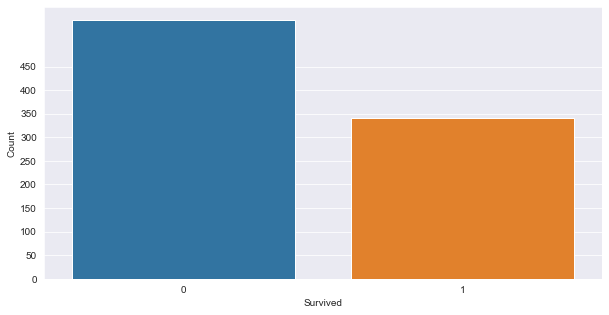

In [4]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.countplot(np.ravel(df["Survived"]))
plt.yticks(range(0,500,50))

plt.ylabel('Count')
plt.xlabel('Survived')

plt.show()

##### Making The Dataset Balance

In [5]:
X = df.drop(['Survived'], axis=1)
Y = df['Survived']

In [6]:
# from imblearn.random_sampling  import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

rdm=RandomOverSampler()
X,y=rdm.fit_resample(X,Y)

df = pd.concat([X,y],axis=1)  #updating the balanced form of dataset

In [7]:
a = df["Survived"].value_counts()

print(f'Died (%) : {a[0] / df.shape[0]}')
print(f'Survived (%) : {a[1] / df.shape[0]}')

Died (%) : 0.5
Survived (%) : 0.5


---

### Train Test Split

In [9]:
X = df.drop(['Survived'], axis=1)
Y = df['Survived']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=1)

In [11]:
print(f'X-train size: {round(x_train.shape[0] / df.shape[0],2)}')
print(f'X-test  size: {round(x_test.shape[0] / df.shape[0],2)}')

X-train size: 0.8
X-test  size: 0.2


### Implementing the VANILA Model

In [12]:
d_tree_classifier = DecisionTreeClassifier()
d_tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [13]:
y_predicted = d_tree_classifier.predict(x_test)
y_train_predicted = d_tree_classifiwer.predict(x_train)

### Evaluating the Model

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,classification_report

In [15]:
print("Train set accuracy score: ",accuracy_score(y_train,y_train_predicted))
print("Test set accuracy score :",  accuracy_score(y_test,y_predicted))

Train set accuracy score:  0.9373576309794989
Test set accuracy score : 0.8090909090909091


<pre><b>As we see there is not large deviation between dataset hence model is in normal state.

In [16]:
from sklearn.metrics import confusion_matrix
print(f'Confusion Matix \n{confusion_matrix(y_test,y_predicted)}')

Confusion Matix 
[[88 19]
 [23 90]]


<pre>
        | 1 |      88(TP)  19(FN)
ACTUAL  |   |
        | 0 |      23(FP)  90(FP)
               --------------------
                  |  1   |   0 |
               --------------------
                  PREDICTED

In [17]:
from sklearn.metrics import classification_report
print(f'Classification Report \n{classification_report(y_test,y_predicted)}')

Classification Report 
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       107
           1       0.83      0.80      0.81       113

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.81      0.81      0.81       220



---

### Model Testing

In [18]:
d_tree_classifier.predict(np.array([[15,0,2,2,5,1]]))

array([1], dtype=int64)

In [19]:
df.columns

Index(['Age', 'Sex', 'Pclass', 'Embarked', 'Family', 'Is_Alone', 'Survived'], dtype='object')

---

### Pickle File For Deployment

In [20]:
import pickle

# Open a file 
file = open('d_tree_classifier.pkl', 'wb')

# dump information to that file
pickle.dump(d_tree_classifier,file)

In [21]:
import pickle
import numpy as np

d = np.array([15,0,2,2,5,1]).reshape(1,-1)

model = pickle.load(open('d_tree_classifier.pkl', 'rb'))
prediction = model.predict(d)
output = prediction[0]
output

1

---